### El Laplaciano en coordenadas polares
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VladP008/NotasEDPs/blob/main/EcuacionesElipticas/PlacaCircular/LaplacianoCircular.ipynb)

Se tiene el siguiente problema 
\begin{equation}
   \left\{
      \begin{aligned}
        r^2 u_{rr} + ru_{r} + u_{\theta\theta} &= 0 && 0<r<1, -\pi<\theta<\pi, \\
u(1,\theta) &= f(\theta)&&-\pi<\theta<\pi, \\
u(1,-\pi) &= u(1,\pi).
      \end{aligned}
    \right.
\end{equation}

La solución del problema está dado por:
La solución de este problema está dada por 
\begin{equation*}
    \boxed{u(r, \theta) = \sum_{n = -\infty}^{\infty}a_n r^{|n|}e^{in\theta}}
\end{equation*}
Donde el coeficiente $a_n$ es el dado por la representación en series de Fourier de la función $f$. Es decir,
$$ f(\theta)=\sum_{n = -\infty}^{\infty}a_n e^{in\theta}$$

#### Código para visualizar la solución

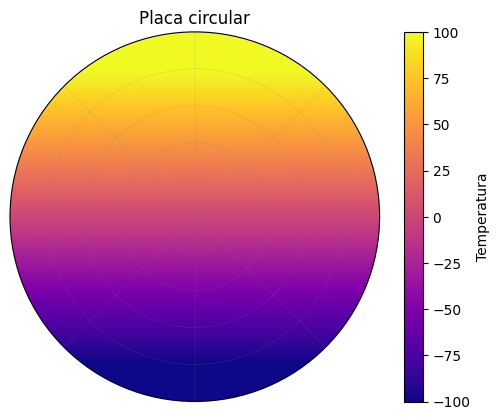

In [1]:
# Se utilizan las siguientes bibliotecas:
import matplotlib.pyplot as plt    # Para las gráficas
import numpy as np                 # Para el uso de arrays
from IPython.display import HTML            # Para poder visualizar la animación en el notebook

# La siguiente instrucción se utiliza para habilitar el modo interactivo en el notebook
%matplotlib inline

# Parámetros del problema
N = 2000                      # Número de puntos para la discretización del dominio espacial
theta = np.linspace(-np.pi,np.pi, N + 1)   # Puntos en el intervalo [0,π]
r = np.linspace(0,1,N + 1 )   # Puntos en el intervalo [0,1]
R,Theta = np.meshgrid(r,theta)
U_pol = np.zeros((N+1,N+1))  # Matriz que guardará la solución para cada (theta,r)
N_s = 3    # Número de términos para la serie 

def coeff(n):
    """Función que regresa el n-ésimo coeficiente de Fourier de la serie
    de en senos de la función f(θ) = -100 si -π<θ<0 ; 100 0<θ<π.

    Parametros
    ----------
    n: int
        Número natural mayor o igual a 1.
    
    Returns
    -------
    coeff: float 
        El n-ésimo coeficiente de Fourier de f.
    """
    if n%2 == 0:
        coeff = 0
    else:
        coeff = 4/(np.pi*n)
    return coeff

def sol():
    """Función que regresa el valor u(r,θ) hasta un número determinado de terminos N_s    
    
    Returns
    -------
    sol: array 
        Solución u(r,θ)
    """
    sol = np.zeros((N+1,N+1))
    for m in range(1,N_s):
        sol = 100*coeff(m)*np.power(R,m)*np.sin(m*Theta) + sol
    return sol

U_pol = sol()  # solución en coordenadas polares

# Método para transformar a coordenadas cartesianas y graficar
X = R*np.cos(Theta)
Y = R*np.sin(Theta)

# Se crea la figura y se fijan parámetros

plt.figure()
ax = plt.subplot(111, projection='polar')  # Crear el gráfico polar

mapa_calor = ax.pcolormesh(Theta, R, U_pol, cmap='plasma', vmin=-100, vmax=100)

# Añadir una barra de color
calor_bar = plt.colorbar(mapa_calor)
calor_bar.set_label('Temperatura')

# Ajustes de los ejes, etiquetas y título
ax.set_title('Placa circular')  # radios
ax.grid(color='grey', linestyle='-', linewidth=0.1)
ax.set_yticklabels([])  
ax.set_xticklabels([])
plt.show() # Mostrar gráfico
#plt.savefig("Problema2.PlacaCircular.2.png")

